### Decision Tree
#### Maliha Lodi 

Decision trees can be used for both regression and classification purposes. For this project, I will be using it for binary classification. This model is based on a tree-like structure where each step is determined by how the previous steps' questions were answered.

I chose to work with this model specifically as the research papers referenced in the project both had XGBoost as their best performing models for this classification. I wanted to see if a "simpler version" of another tree-based model, like XGBoost, would be able to give similar results.

### Importing packages and data

In [91]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import tree
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif, SequentialFeatureSelector
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, roc_curve
from sklearn.metrics import precision_recall_fscore_support as score, precision_score, recall_score, f1_score

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/afnanrahman/EAFP/main/data/clean_smote_data.csv")
data

,age,business_travel,daily_rate,department,distance_from_home,education,education_field,employee_number,environment_satisfaction,gender,hourly_rate,job_involvement,job_level,job_role,job_satisfaction,marital_status,monthly_rate,num_companies_worked,over_time,percent_salary_hike,performance_rating,relationship_satisfaction,stock_option_level,total_working_years,training_times_last_year,work_life_balance,years_at_company,years_in_current_role,years_with_curr_manager,attrition,rate_avg
0,41,2,1102,2,1,2,1,1,2,0,94,3,2,7,4,2,19479,8,1,11,3,1,0,8,0,1,6,4,5,1,6891.67
1,49,1,279,1,8,1,1,2,3,1,61,2,2,6,2,1,24907,1,0,23,4,4,1,10,3,3,10,7,7,0,8415.67
2,37,2,1373,1,2,2,4,4,4,1,92,2,1,2,3,2,2396,6,1,15,3,2,0,7,3,3,0,0,0,1,1287.00
3,33,1,1392,1,3,4,1,5,4,0,56,3,1,6,3,1,23159,1,1,11,3,3,0,8,3,3,8,7,0,0,8202.33
4,27,2,591,1,2,1,3,7,1,1,40,3,1,2,2,1,16632,9,0,12,3,4,1,6,3,3,2,2,2,0,5754.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2461,39,2,1053,1,7,2,2,1160,1,0,72,1,1,0,1,1,14504,4,0,13,3,1,0,12,2,2,1,0,0,1,5209.67
2462,32,0,453,1,11,2,3,998,3,1,43,2,1,4,1,1,10219,0,1,22,4,2,0,4,0,2,3,2,2,1,3571.67
2463,34,2,489,1,7,3,2,1729,3,1,59,2,2,4,1,1,5098,1,0,13,3,2,0,10,4,1,10,4,7,1,1882.00
2464,36,2,237,1,18,3,1,1080,1,0,49,2,1,5,2,1,11643,4,1,11,3,2,0,12,1,2,6,3,2,1,3976.33


### Base Model

In [3]:
#not including target variable in X 
X = data.drop('attrition', axis=1)
Y = data['attrition']

In [4]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [5]:
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, Y_train)

DecisionTreeClassifier(random_state=42)

In [6]:
dt_Y_pred = decision_tree.predict(X_test)

In [7]:
decision_tree.score(X_test, Y_test)

0.8135135135135135

[Text(0.5559724297161484, 0.9736842105263158, 'X[22] <= 0.5\ngini = 0.5\nsamples = 1726\nvalue = [864, 862]'),
 Text(0.34941599891348635, 0.9210526315789473, 'X[12] <= 1.5\ngini = 0.442\nsamples = 966\nvalue = [319, 647]'),
 Text(0.24208882249083255, 0.868421052631579, 'X[14] <= 3.5\ngini = 0.312\nsamples = 574\nvalue = [111, 463]'),
 Text(0.20888224908325412, 0.8157894736842105, 'X[7] <= 1941.0\ngini = 0.246\nsamples = 501\nvalue = [72, 429]'),
 Text(0.18267010729322286, 0.7631578947368421, 'X[11] <= 3.5\ngini = 0.224\nsamples = 490\nvalue = [63, 427]'),
 Text(0.1519760966997148, 0.7105263157894737, 'X[8] <= 3.5\ngini = 0.201\nsamples = 476\nvalue = [54, 422]'),
 Text(0.11449137579790847, 0.6578947368421053, 'X[21] <= 3.5\ngini = 0.145\nsamples = 406\nvalue = [32, 374]'),
 Text(0.09602064375933722, 0.6052631578947368, 'X[24] <= 5.5\ngini = 0.108\nsamples = 367\nvalue = [21, 346]'),
 Text(0.08732853456471547, 0.5526315789473685, 'X[0] <= 18.5\ngini = 0.099\nsamples = 364\nvalue = [19, 

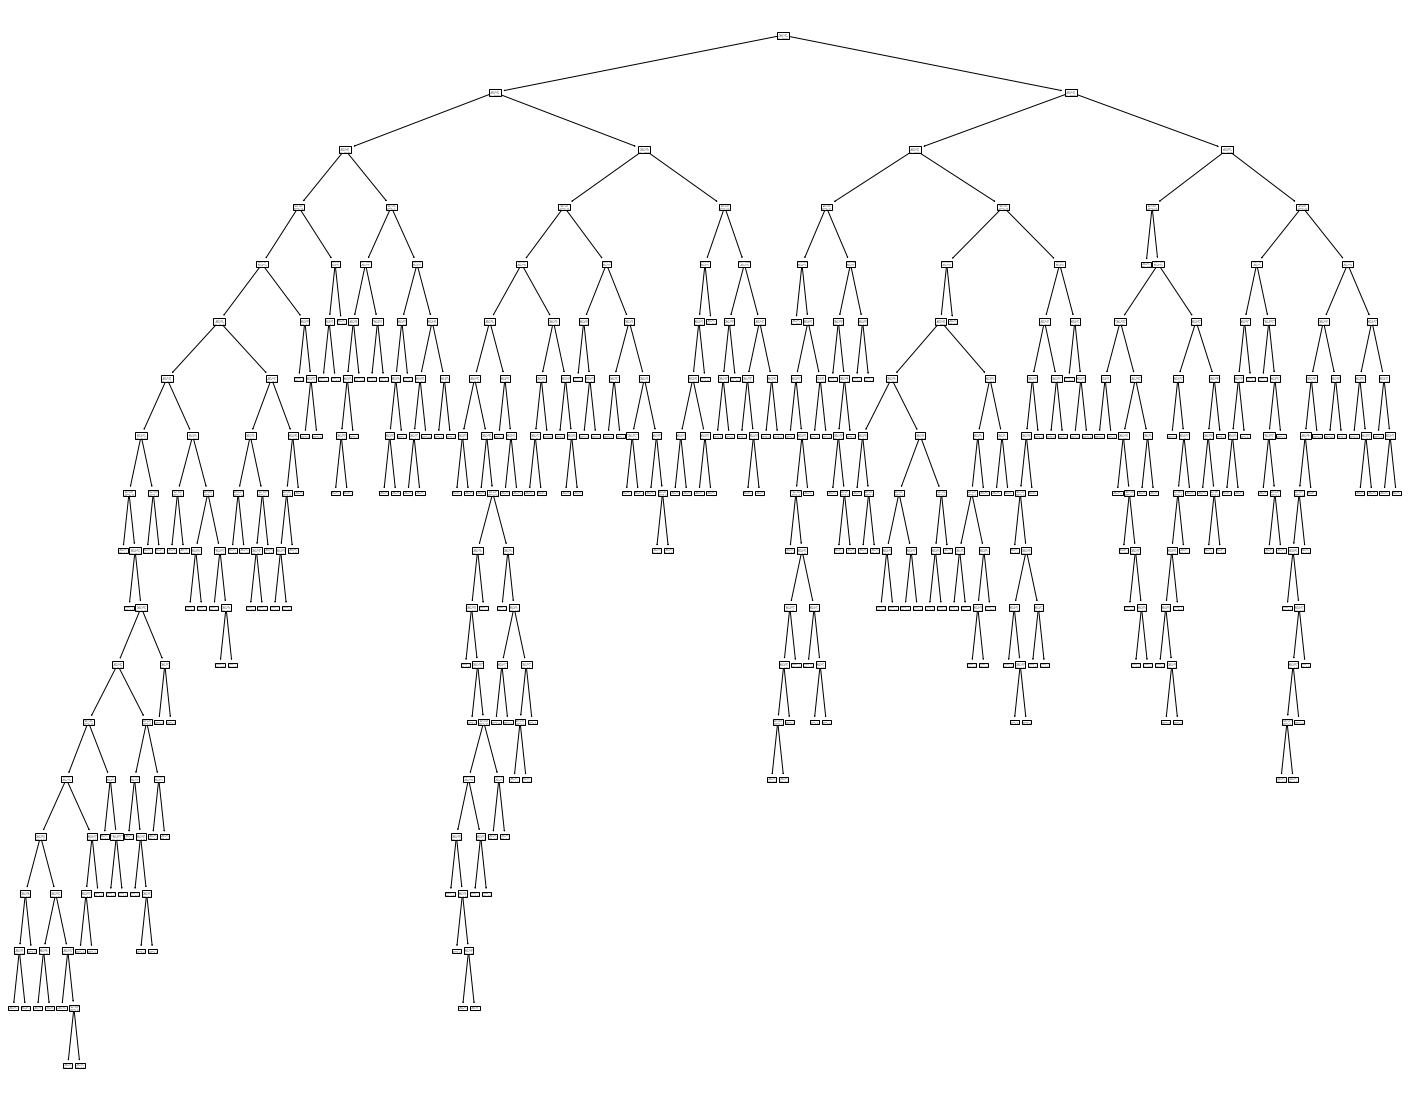

In [10]:
plt.figure(figsize=(25, 20))
tree.plot_tree(decision_tree)

### Manual Feature Selection
Accuracy: 74.6%

In [ ]:
#### CODE GOES HERE (its fine if you use more than one code cell, I'm assuming that you probably will)
#### Remember to comment your code/add text cells explaining anything as you deem fit

I tried to choose columns based on financial factors which could factor into an employee quitting.

In [14]:
cols = ['age', 'job_satisfaction', 'over_time', 'percent_salary_hike', 'stock_option_level', 'rate_avg', 'environment_satisfaction']

In [15]:
#not including target variable in X 
manual_X = data.drop('attrition', axis=1)[cols]
manual_Y = data['attrition']

In [16]:
manual_X_train, manual_X_test, manual_Y_train, manual_Y_test = train_test_split(manual_X, manual_Y, test_size=0.3, random_state=42)

In [17]:
manual_dt = DecisionTreeClassifier(random_state=42)
manual_dt.fit(manual_X_train, manual_Y_train)

DecisionTreeClassifier(random_state=42)

In [18]:
manual_dt_Y_pred = manual_dt.predict(manual_X_test)

In [19]:
manual_dt.score(manual_X_test, manual_Y_test)

0.745945945945946

### Feature Selection 

#### Filter Method using the ANOVA correlation constant

Final Accuracy: 78.4%

SelectKBest with k='all'

In [20]:
k_best = SelectKBest(score_func=f_classif, k='all')
k_best.fit(X_train, Y_train)
X_train_select = k_best.transform(X_train)
X_test_select = k_best.transform(X_test)

In [21]:
score_df = pd.DataFrame({'Scores': k_best.scores_}, index=list(X_train))
score_df.sort_values(by='Scores', ascending=False)

,Scores
job_level,252.184784
job_involvement,219.524410
stock_option_level,203.400042
work_life_balance,142.300362
environment_satisfaction,139.702217
years_with_curr_manager,138.605275
total_working_years,133.780052
job_satisfaction,123.149892
training_times_last_year,121.555022
years_in_current_role,119.083473


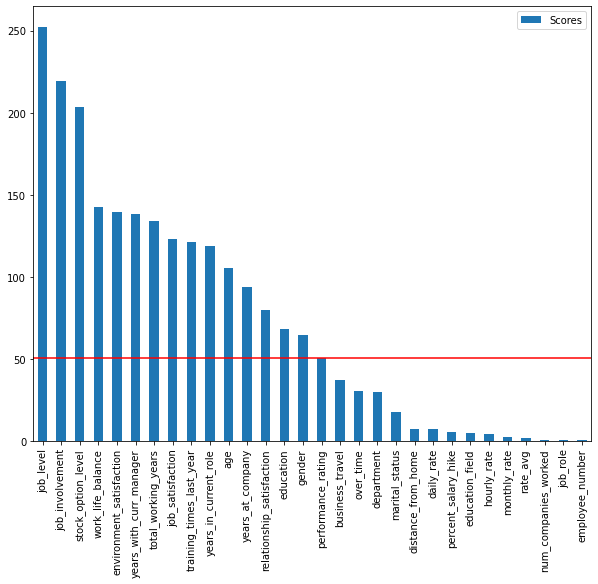

In [22]:
score_df.sort_values(by='Scores', ascending=False).plot(kind='bar', figsize=(10,8))
plt.axhline(y=50.5, color='r')

Based on the bar graph above, I chose to include only the top 15 features as they were provided the 'best' scores before we saw a big drop.




In [23]:
k15_best = SelectKBest(score_func=f_classif, k=15)
k15_best.fit(X_train, Y_train)
X_train_select = k15_best.transform(X_train)
X_test_select = k15_best.transform(X_test)

In [24]:
X_train.columns.values[k15_best.get_support()]

array(['age', 'education', 'environment_satisfaction', 'gender',
       'job_involvement', 'job_level', 'job_satisfaction',
       'relationship_satisfaction', 'stock_option_level',
       'total_working_years', 'training_times_last_year',
       'work_life_balance', 'years_at_company', 'years_in_current_role',
       'years_with_curr_manager'], dtype=object)

In [28]:
k15_dt = DecisionTreeClassifier(random_state=42)
k15_dt.fit(X_train_select, Y_train)

DecisionTreeClassifier(random_state=42)

In [29]:
Y_pred = k15_dt.predict(X_test_select)

In [30]:
accuracy_score(Y_test, Y_pred)

0.7837837837837838

#### Filter Method using the mutual information statistic
Final Accuracy: 76.8%


In [32]:
mis_k_best = SelectKBest(score_func=mutual_info_classif, k='all')
mis_k_best.fit(X_train, Y_train)
X_train_mis = mis_k_best.transform(X_train)
X_test_mis = mis_k_best.transform(X_test)

In [34]:
mis_df = pd.DataFrame({'Scores': mis_k_best.scores_}, index=list(X_train))
mis_df.sort_values(by='Scores', ascending=False)

,Scores
job_level,0.085445
stock_option_level,0.077030
monthly_rate,0.065315
years_with_curr_manager,0.064420
job_involvement,0.061430
total_working_years,0.057706
years_in_current_role,0.057642
business_travel,0.052492
rate_avg,0.049190
education_field,0.044018


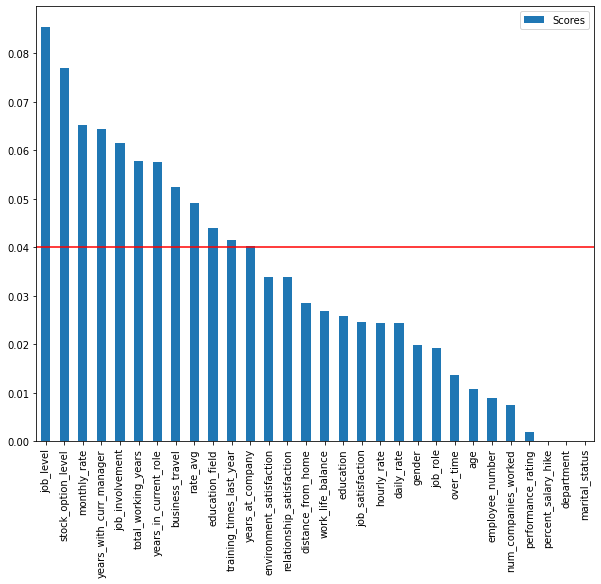

In [35]:
mis_df.sort_values(by='Scores', ascending=False).plot(kind='bar', figsize=(10,8))
plt.axhline(y=0.04, color='r')

Like before, I chose to include only the top 12 features as they were provided the 'best' scores before we saw a big drop based on the bar graph above.

In [37]:
k12_best_mis = SelectKBest(score_func=mutual_info_classif, k=12)
k12_best_mis.fit(X_train, Y_train)
X_train_mis = k12_best_mis.transform(X_train)
X_test_mis = k12_best_mis.transform(X_test)

In [38]:
X_train.columns.values[k12_best_mis.get_support()]

array(['age', 'business_travel', 'job_involvement', 'job_level',
       'monthly_rate', 'stock_option_level', 'total_working_years',
       'training_times_last_year', 'years_at_company',
       'years_in_current_role', 'years_with_curr_manager', 'rate_avg'],
      dtype=object)

In [46]:
k12_mis_dt = DecisionTreeClassifier(random_state=42)
k12_mis_dt.fit(X_train_mis, Y_train)

DecisionTreeClassifier(random_state=42)

In [47]:
Y_pred = k12_mis_dt.predict(X_test_mis)

In [48]:
accuracy_score(Y_test, Y_pred)

0.7675675675675676

#### Wrapper Method using the `SequentialFeatureSelector` with `direction = 'forward'`
Final Accuracy: 83.9%


In [49]:
wrapper_dt = DecisionTreeClassifier(random_state=42)
sfs_f = SequentialFeatureSelector(wrapper_dt, n_features_to_select=15, direction="forward", scoring='accuracy')
sfs_f = sfs_f.fit(X_train, Y_train)

In [50]:
cols = sfs_f.get_support(indices=True)
feat_sfs = X_train.iloc[:, cols].columns
feat_sfs

Index(['business_travel', 'daily_rate', 'education',
       'environment_satisfaction', 'gender', 'job_involvement', 'job_level',
       'job_satisfaction', 'marital_status', 'over_time',
       'relationship_satisfaction', 'stock_option_level',
       'training_times_last_year', 'work_life_balance', 'rate_avg'],
      dtype='object')

In [51]:
X_train_sfs = X_train[feat_sfs]
wrapper_dt.fit(X_train_sfs, Y_train)

X_test_sfs = X_test[feat_sfs]
Y_pred_sfs = wrapper_dt.predict(X_test_sfs)

In [52]:
accuracy_score(Y_test, Y_pred_sfs)

0.7797297297297298

In [53]:
scores = {}
features = {}
for i in range(1,30):
  dt = DecisionTreeClassifier()
  sfs = SequentialFeatureSelector(dt, n_features_to_select=i, direction="forward", scoring='accuracy')
  sfs = sfs.fit(X_train, Y_train)

  cols = sfs.get_support(indices=True)
  feat_sfs = X_train.iloc[:, cols].columns
  features[i] = feat_sfs

  dt.fit(X_train[feat_sfs], Y_train)
  Y_pred_sfs = dt.predict(X_test[feat_sfs])
  scores[i] = accuracy_score(Y_test, Y_pred_sfs)

In [54]:
scores

{1: 0.6675675675675675,
 2: 0.7135135135135136,
 3: 0.7513513513513513,
 4: 0.7945945945945946,
 5: 0.7891891891891892,
 6: 0.7918918918918919,
 7: 0.7932432432432432,
 8: 0.8108108108108109,
 9: 0.8391891891891892,
 10: 0.8324324324324325,
 11: 0.8378378378378378,
 12: 0.8189189189189189,
 13: 0.8040540540540541,
 14: 0.8216216216216217,
 15: 0.8175675675675675,
 16: 0.822972972972973,
 17: 0.8162162162162162,
 18: 0.7932432432432432,
 19: 0.7986486486486486,
 20: 0.7864864864864864,
 21: 0.8216216216216217,
 22: 0.7891891891891892,
 23: 0.8175675675675675,
 24: 0.7959459459459459,
 25: 0.7837837837837838,
 26: 0.8243243243243243,
 27: 0.8013513513513514,
 28: 0.8040540540540541,
 29: 0.8175675675675675}

In [55]:
max(scores.values())

0.8391891891891892

In [56]:
features.get(9)

Index(['business_travel', 'education_field', 'job_involvement', 'job_level',
       'job_satisfaction', 'over_time', 'relationship_satisfaction',
       'stock_option_level', 'rate_avg'],
      dtype='object')

### Hyperparameter Tuning
For Decision Trees, there are a few hyperparameters which are commonly tuned that we can choose to look at: 

*   **max_depth**: how deep the tree can be (the deeper the tree, the more splits and hence the more info it captures about the data)
*   **min_samples_leaf**: if possible split results in a new node with less than this number of entries in the node itself, then the split will not happen and the current node will remain a leaf
*   **min_samples_split**: if number of entries in current node is less than this number, then this current node will not split and become a leaf node
*   **criterion**: function that outputs a numerical value which dictates how 'good' the split was


**NOTE:** As feature selection is not necessarily required for decision trees, I will tune a decision tree with the selected features discovered in previous sections, and without any selected features (i.e use all features available in the dataset).

#### Tuning without feature selection


##### Grid Search
Accuracy = 79.3%

In [60]:
param_dict = {
    'max_depth': np.arange(5, 15),
    'min_samples_leaf': np.arange(3, 15),
    'min_samples_split': np.arange(3, 15),
    'criterion': ['gini', 'entropy']
} 

In [61]:
grid_search = GridSearchCV(decision_tree, #this decision tree object was originally used in the base run -> trained on entire dataset
                           param_grid = param_dict,
                           cv = 25,
                           verbose=1)
grid_search.fit(X_train, Y_train)

Fitting 25 folds for each of 2880 candidates, totalling 72000 fits


GridSearchCV(cv=25, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
                         'min_samples_leaf': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
                         'min_samples_split': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])},
             verbose=1)

In [62]:
grid_search.best_params_

{'criterion': 'entropy',
 'max_depth': 7,
 'min_samples_leaf': 7,
 'min_samples_split': 3}

In [63]:
grid_pred = grid_search.predict(X_test)
accuracy_score(Y_test, grid_pred)

0.7932432432432432

##### Random Search
Accuracy = 83.1%

In [69]:
random_dict = {
    'max_depth': np.arange(5, 15),
    'min_samples_leaf': np.arange(3, 15),
    'min_samples_split': np.arange(3, 15),
    'criterion': ['gini', 'entropy']
} 

In [73]:
random_search = RandomizedSearchCV(decision_tree, #this decision tree object was originally used in the base run -> trained on entire dataset
                           param_distributions = random_dict,
                           verbose=1,
                           cv=25,
                           random_state=42)
random_search.fit(X_train, Y_train)

Fitting 25 folds for each of 10 candidates, totalling 250 fits


RandomizedSearchCV(cv=25, estimator=DecisionTreeClassifier(random_state=42),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
                                        'min_samples_leaf': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
                                        'min_samples_split': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])},
                   random_state=42, verbose=1)

In [74]:
random_search.best_params_

{'criterion': 'gini',
 'max_depth': 8,
 'min_samples_leaf': 5,
 'min_samples_split': 13}

In [75]:
random_pred = random_search.predict(X_test)
accuracy_score(Y_test, random_pred)

0.831081081081081

#### Tuning with feature selection


##### Getting data with only the selected features

In [64]:
selected_features = ['business_travel', 'education_field', 'job_involvement', 
                     'job_level', 'job_satisfaction', 'over_time', 
                     'relationship_satisfaction', 'stock_option_level', 'rate_avg']

X_feat = data[selected_features]
Y_feat = data['attrition']

In [65]:
X_train_feat, X_test_feat, Y_train_feat, Y_test_feat = train_test_split(X_feat, Y_feat, test_size=0.3, random_state=42)

In [66]:
dt_feat = DecisionTreeClassifier(random_state=42)
dt_feat.fit(X_train_feat, Y_train_feat)

DecisionTreeClassifier(random_state=42)

In [67]:
dt_feat_Y_pred = dt_feat.predict(X_test_feat)

In [68]:
dt_feat.score(X_test_feat, Y_test_feat)

0.8445945945945946

Accuracy: 84.4%

##### Grid Search
Accuracy: 82.7%

In [77]:
grid_search_feat = GridSearchCV(dt_feat, 
                           param_grid = param_dict,
                           cv = 25,
                           verbose=1)
grid_search_feat.fit(X_train_feat, Y_train_feat)

Fitting 25 folds for each of 2880 candidates, totalling 72000 fits


GridSearchCV(cv=25, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
                         'min_samples_leaf': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
                         'min_samples_split': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])},
             verbose=1)

In [78]:
grid_search_feat.best_params_

{'criterion': 'gini',
 'max_depth': 8,
 'min_samples_leaf': 5,
 'min_samples_split': 13}

In [80]:
grid_pred_feat = grid_search_feat.predict(X_test_feat)
accuracy_score(Y_test_feat, grid_pred_feat)

0.827027027027027

##### Random Search
Accuracy: 82.7%

In [84]:
random_search_feat = RandomizedSearchCV(dt_feat,
                           param_distributions = random_dict,
                           verbose=1,
                           cv=25,
                           random_state=42)
random_search_feat.fit(X_train_feat, Y_train_feat)

Fitting 25 folds for each of 10 candidates, totalling 250 fits


RandomizedSearchCV(cv=25, estimator=DecisionTreeClassifier(random_state=42),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
                                        'min_samples_leaf': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
                                        'min_samples_split': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])},
                   random_state=42, verbose=1)

In [85]:
random_search_feat.best_params_

{'criterion': 'gini',
 'max_depth': 8,
 'min_samples_leaf': 5,
 'min_samples_split': 13}

In [86]:
random_pred_feat = random_search_feat.predict(X_test_feat)
accuracy_score(Y_test_feat, random_pred_feat)

0.827027027027027

As mentioned previously and seen above, this decision tree model works best with just the selected features. We do not need to do additional hyperparameter tuning to get better results.

### Model Metrics

In [87]:
accuracy_score(Y_test_feat, dt_feat_Y_pred)

0.8445945945945946

In [92]:
precision_score(Y_test_feat, dt_feat_Y_pred)

0.8298969072164949

In [93]:
recall_score(Y_test_feat, dt_feat_Y_pred)

0.8679245283018868

In [94]:
f1_score(Y_test_feat, dt_feat_Y_pred)

0.8484848484848486

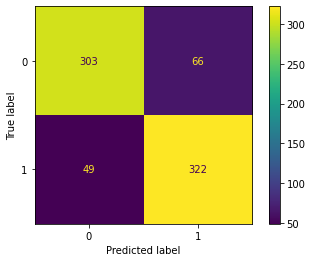

In [95]:
random_cm = confusion_matrix(Y_test_feat, dt_feat_Y_pred)
random_cm_plot = ConfusionMatrixDisplay(confusion_matrix=random_cm)
random_cm_plot.plot()